# PySAL *segregation* module for aspatial indexes

This is an example notebook of functionalities for aspatial indexes of the *segregation* module. Firstly, we need to import the packages we need.

In [1]:
%matplotlib inline

import geopandas as gpd
from pysal.explore import segregation
import pysal.lib

Then it's time to load some data to estimate segregation. We use the data of 2000 Census Tract Data for the metropolitan area of Sacramento, CA, USA. 

We use a geopandas dataframe available in PySAL examples repository. We highlight that for nonspatial segregation measures only a pandas dataframe would also work to estimate.

For more information about the data: https://github.com/pysal/pysal.lib/tree/master/pysal.lib/examples/sacramento2

In [2]:
s_map = gpd.read_file(pysal.lib.examples.get_path("sacramentot2.shp"))
s_map.columns

Index(['FIPS', 'MSA', 'TOT_POP', 'POP_16', 'POP_65', 'WHITE_', 'BLACK_',
       'ASIAN_', 'HISP_', 'MULTI_RA', 'MALES', 'FEMALES', 'MALE1664',
       'FEM1664', 'EMPL16', 'EMP_AWAY', 'EMP_HOME', 'EMP_29', 'EMP_30',
       'EMP16_2', 'EMP_MALE', 'EMP_FEM', 'OCC_MAN', 'OCC_OFF1', 'OCC_INFO',
       'HH_INC', 'POV_POP', 'POV_TOT', 'HSG_VAL', 'FIPSNO', 'POLYID',
       'geometry'],
      dtype='object')

The data have several demographic variables. We are going to assess the segregation of the Hispanic Population (variable 'HISP_'). For this, we only extract some columns of the geopandas dataframe.

In [3]:
gdf = s_map[['geometry', 'HISP_', 'TOT_POP']]

We also can plot the spatial distribution of the composition of the Hispanic population over the tracts of Sacramento:

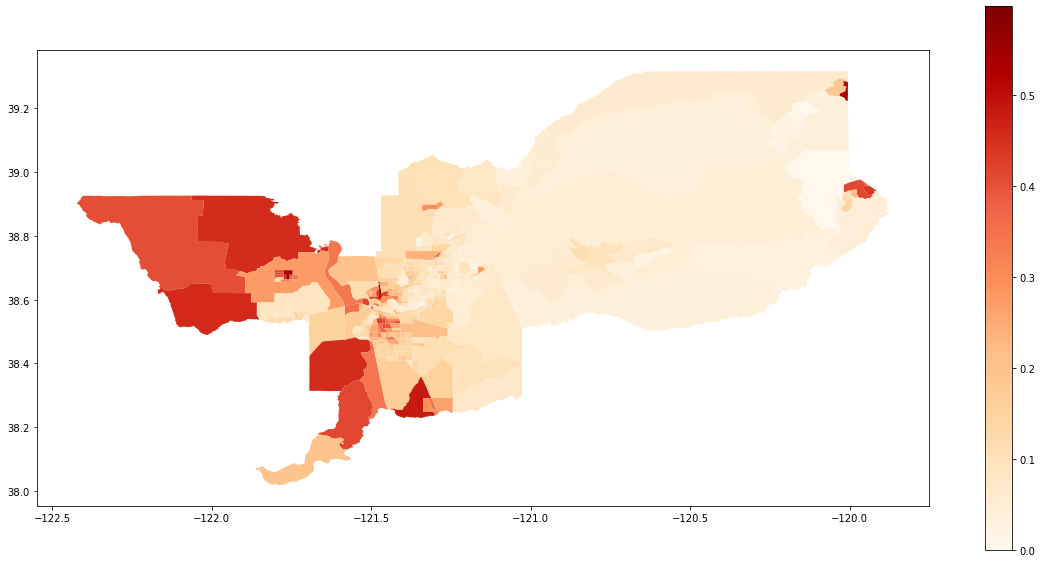

In [4]:
gdf['composition'] = gdf['HISP_'] / gdf['TOT_POP']

gdf.plot(column = 'composition',
         cmap = 'OrRd', 
         figsize=(20,10),
         legend = True)

## Notation

For consistency of notation, we assume that $n_{ij}$ is the population of unit $i \in \{1, ..., I\}$ of group $j \in \{x, y\}$, also $\sum_{j}n_{ij} = n_{i.}$, $\sum_{i}n_{ij} = n_{.j}$, $\sum_{i}\sum_{j}n_{ij} = n_{..}$, $\tilde{s}_{ij} = \frac{n_{ij}}{n_{i.}}$, $\hat{s}_{ij} = \frac{n_{ij}}{n_{.j}}$. The segregation indexes can be build for any group $j$ of the data.

### Dissimilarity

Introduced by *Duncan, O. and B. Duncan (1955). A methodological analysis of segregation indexes. American Sociological Review 20, 210–17.*, the Dissimilarity Index (D) is given by:

\begin{equation}
D=\sum_{i=1}^{I}\frac{n_{i.}\mid \tilde{s}_{ij}-\frac{n_{.j}}{n_{..}}\mid}{2n_{..}\frac{n_{.j}}{n_{..}}\left ( 1-\frac{n_{.j}}{n_{..}} \right ).}
\end{equation}

$$0 \leqslant D \leqslant 1$$

The index is fitted below:

In [5]:
from pysal.explore.segregation.aspatial import Dissim
index = Dissim(gdf, 'HISP_', 'TOT_POP')
type(index)

segregation.aspatial.aspatial_indexes.Dissim

All the **segregation** classes have the *statistic* and the *core_data* attributes. We can access the point estimation of D for the data set with the **statistic** attribute:

In [6]:
index.statistic

0.32184656076566864

The interpretation of this value is that 32.18% of the hispanic population would have to move to reach eveness in Sacramento.

### Gini

The Gini coefficient is given by:

\begin{equation}
G=\sum_{i_1=1}^{I}\sum_{i_2=1}^{I}\frac{n_{i_1.}n_{i_2.}\mid \tilde{s}_{ij}^{i_1}-\tilde{s}_{ij}^{i_2}\mid}{2n_{..}^2\frac{n_{.j}}{n_{..}}\left ( 1-\frac{n_{.j}}{n_{..}} \right )}
\end{equation}

The index is fitted below:

In [7]:
from pysal.explore.segregation.aspatial import GiniSeg
index = GiniSeg(gdf, 'HISP_', 'TOT_POP')
type(index)

segregation.aspatial.aspatial_indexes.GiniSeg

In [8]:
index.statistic

0.43506510676886234

### Entropy 

The global entropy (E) is given by:

\begin{equation}
E = \frac{n_{.j}}{n_{..}} \ log\left ( \frac{1}{\frac{n_{.j}}{n_{..}}} \right )+\left ( 1-\frac{n_{.j}}{n_{..}} \right )log\left ( \frac{1}{1-\frac{n_{.j}}{n_{..}}} \right )
\end{equation}

while the unit's entropy is analogously:

\begin{equation}
E_i = \tilde{s}_ {ij} \ log\left ( \frac{1}{\tilde{s}_ {ij}} \right )+\left ( 1-\tilde{s}_ {ij} \right )log\left ( \frac{1}{1-\tilde{s}_ {ij}} \right ).
\end{equation}

Therefore, the entropy index (H) is given by:

\begin{equation}
H = \sum_{i=1}^{I}\frac{n_{i.}\left ( E-E_i \right )}{En_{..}}
\end{equation}

The index is fitted below:

In [9]:
from pysal.explore.segregation.aspatial import Entropy
index = Entropy(gdf, 'HISP_', 'TOT_POP')
type(index)

segregation.aspatial.aspatial_indexes.Entropy

In [10]:
index.statistic

0.09459760633014454

### Atkinson

The Atkinson index (A) is given by:

\begin{equation}
A = 1 - \frac{\frac{n_{.j}}{n_{..}}}{1-\frac{n_{.j}}{n_{..}}}\left | \sum_{i=1}^{I}\left [ \frac{\left ( 1-\tilde{s}_{ij} \right )^{1-b}\tilde{s}_{ij}^bt_i}{\frac{n_{.j}}{n_{..}}n_{..}} \right ] \right |^{\frac{1}{1-b}}
\end{equation}
where $b$ is a shape parameter that determines how to weight the increments to segregation contributed by different portions of the Lorenz curve.

The index is fitted below (note you can modify the parameter *b*):

In [11]:
from pysal.explore.segregation.aspatial import Atkinson
index = Atkinson(gdf, 'HISP_', 'TOT_POP', b = 0.5)
type(index)

segregation.aspatial.aspatial_indexes.Atkinson

In [12]:
index.statistic

0.15079259382667654

### Concentration Profile

The Concentration Profile (R) measure is discussed in Hong, Seong-Yun, and Yukio Sadahiro. "Measuring geographic segregation: a graph-based approach." *Journal of Geographical Systems* 16.2 (2014): 211-231. and tries to inspect the evenness aspect of segregation. The threshold proportion $t$ is given by:

\begin{equation}
\upsilon_t = \frac{\sum_{i=1}^{I}n_{ij}g(t,i)}{\sum_{i=1}^{I}n_{ij}}.
\end{equation}

In the equation, $g(t, i)$ is a logical function that is defined as:

\begin{equation}
  g(t,i) =
  \begin{cases}
    1 & if \ \frac{n_{ij}}{n_{i.}} \geqslant t \\
    0 & \ otherwise.
  \end{cases}
\end{equation}

The Concentration Profile (R) is given by:

\begin{equation}
R=\frac{\frac{n_{.j}}{n_{..}}-\left ( \int_{t=0}^{\frac{n_{.j}}{n_{..}}}\upsilon_tdt - \int_{t=\frac{n_{.j}}{n_{..}}}^{1}\upsilon_tdt \right )}{1-\frac{n_{.j}}{n_{..}}}.
\end{equation}

The index is fitted below:

In [13]:
from pysal.explore.segregation.aspatial import ConProf
index = ConProf(gdf, 'HISP_', 'TOT_POP')
type(index)

segregation.aspatial.aspatial_indexes.ConProf

In [14]:
index.statistic

0.1376874794741899

In addition, this index has a plotting method to see the profile estimated.

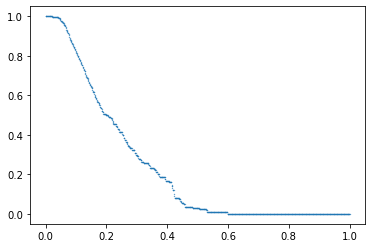

In [15]:
index.plot()

### Isolation

Isolation (xPx) assess how much a minority group is only exposed to the same group. In other words, how much they only interact the members of the group that they belong. Assuming $j = x$ as the minority group, the isolation of $x$ is giving by:

\begin{equation}
xPx=\sum_{i=1}^{I}\left ( \hat{s}_{ix} \right )\left ( \tilde{s}_{ix} \right ).
\end{equation}

The index is fitted below:

In [16]:
from pysal.explore.segregation.aspatial import Isolation
index = Isolation(gdf, 'HISP_', 'TOT_POP')
type(index)

segregation.aspatial.aspatial_indexes.Isolation

In [17]:
index.statistic

0.2319615486459151

The interpretation of this number is that if you randomly pick a hispanic person of a specific tract of Sacramento, there is 23.19% of probability that this member shares a unit with another hispanic.

### Exposure

The Exposure (xPy) of $x$ is giving by

\begin{equation}
xPy=\sum_{i=1}^{I}\left ( \hat{s}_{iy} \right )\left ( \tilde{s}_{iy} \right ).
\end{equation}

The index is fitted below:

In [18]:
from pysal.explore.segregation.aspatial import Exposure
index = Exposure(gdf, 'HISP_', 'TOT_POP')
type(index)

segregation.aspatial.aspatial_indexes.Exposure

In [19]:
index.statistic

0.7680384513540848

The interpretation of this number is that if you randomly pick a hispanic person of a specific tract of Sacramento, there is 76.8% of probability that this member shares a unit with an nonhispanic.

### Correlation Ratio

The correlation ratio (V or $Eta^2$) is given by

\begin{equation}
V = Eta^2 = \frac{xPx - \frac{n_{.x}}{n_{..}}}{1 - \frac{n_{.x}}{n_{..}}}.
\end{equation}

The index is fitted below:

In [20]:
from pysal.explore.segregation.aspatial import CorrelationR
index = CorrelationR(gdf, 'HISP_', 'TOT_POP')
type(index)

segregation.aspatial.aspatial_indexes.CorrelationR

In [21]:
index.statistic

0.09164042012926693

### Modified Dissimilarity 

The Modified Dissimilarity Index (Dct) based on Carrington, W. J., Troske, K. R., 1997. On measuring segregation in samples with small units. *Journal of Business & Economic Statistics* 15 (4), 402–409, evaluates the deviation from simulated evenness. This measure is estimated by taking the mean of the classical $D$ under several simulations under evenness from the global minority proportion.

Let $D^*$ be the average of the classical D under simulations draw assuming evenness from the global minority proportion. The value of Dct can be evaluated with the following equation: 

\begin{equation}
  Dct =
  \begin{cases}
    \frac{D-D^*}{1-D^*} & if \ D \geqslant D^* \\
    \frac{D-D^*}{D^*} & if \ D < D^*
  \end{cases}
\end{equation}

The index is fitted below (note you can change the number of simulations):

In [22]:
from pysal.explore.segregation.aspatial import ModifiedDissim
index = ModifiedDissim(gdf, 'HISP_', 'TOT_POP', iterations = 500)
type(index)

segregation.aspatial.aspatial_indexes.ModifiedDissim

In [23]:
index.statistic

0.3107671010817375

### Modified Gini

The Modified Gini (Gct) based also on Carrington, W. J., Troske, K. R., 1997. On measuring segregation in samples with small units. *Journal of Business & Economic Statistics* 15 (4), 402–409, evaluates the deviation from simulated evenness. This measure is estimated by taking the mean of the classical G under several simulations under evenness from the global minority proportion.

Let $G^*$ be the average of G under simulations draw assuming evenness from the global minority proportion. The value of Gct can be evaluated with the following equation: 

\begin{equation}
  Gct =
  \begin{cases}
    \frac{G-G^*}{1-G^*} & if \ G \geqslant G^* \\
    \frac{G-G^*}{G^*} & if \ G < G^*
  \end{cases}
\end{equation}

The index is fitted below (note you can change the number of simulations):

In [24]:
from pysal.explore.segregation.aspatial import ModifiedGiniSeg
index = ModifiedGiniSeg(gdf, 'HISP_', 'TOT_POP', iterations = 500)
type(index)

segregation.aspatial.aspatial_indexes.ModifiedGiniSeg

In [25]:
index.statistic

0.42180272133518487

### Bias-Corrected Dissimilarity

The Bias-Corrected Dissimilarity (Dbc) index is presented in Allen, R., Burgess, S., Davidson, R., Windmeijer, F., 2015. More reliable inference for the dissimilarity index of segregation. *The econometrics journal* 18 (1), 40–66. The Dbc is given by:

\begin{equation}
    D_{bc} = 2D - \bar{D}_b
\end{equation}
where $\bar{D}_b$ is the average of $B$ resampling using the
observed conditional probabilities for a multinomial distribution for each group independently.

The index is fitted below (note you can change the value of B):

In [26]:
from pysal.explore.segregation.aspatial import BiasCorrectedDissim
index = BiasCorrectedDissim(gdf, 'HISP_', 'TOT_POP', B = 500)
type(index)

segregation.aspatial.aspatial_indexes.BiasCorrectedDissim

In [27]:
index.statistic

0.3213833896347817

### Density-Corrected Dissimilarity

The Density-Corrected Dissimilarity (Ddc) index is presented in Allen, R., Burgess, S., Davidson, R., Windmeijer, F., 2015. More reliable inference for the dissimilarity index of segregation. *The econometrics journal* 18 (1), 40–66. The Ddc measure is given by:

\begin{equation}
D_{dc} = \frac{1}{2}\sum_{i=1}^{I} \hat{\sigma}_{i} n\left ( \hat{\theta}_i \right )
\end{equation}

where

\begin{equation*}
\hat{\sigma}^2_i = \frac{\hat{s}_{ix} (1-\hat{s}_{ix})}{n_{.x}} + \frac{\hat{s}_{iy} (1-\hat{s}_{iy})}{n_{.y}} 
\end{equation*}

and $n\left ( \hat{\theta}_i \right )$ is the $\theta_i$ that maximizes the folded normal distribution $\phi(\hat{\theta}_i-\theta_i) + \phi(\hat{\theta}_i+\theta_i)$ where

\begin{equation*}
\hat{\theta_i} = \frac{\left | \hat{s}_{ix}-\hat{s}_{iy} \right |}{\hat{\sigma_i}}.
\end{equation*}

and $\phi$ is the standard normal density.

The index is fitted below (note you can change the tolerance of the optimization step):

In [28]:
from pysal.explore.segregation.aspatial import DensityCorrectedDissim
index = DensityCorrectedDissim(gdf, 'HISP_', 'TOT_POP', xtol = 1e-5)
type(index)

segregation.aspatial.aspatial_indexes.DensityCorrectedDissim

In [29]:
index.statistic

0.295205155464069